# 📊 Test Exploratory Data Analysis — Social Media Sentiment Insights

**Objective:**  
Understand the dataset structure, detect missing values, explore distributions and early patterns to guide future modeling or insights presentation. hello

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual settings
pd.set_option("display.max_colwidth", 120)
plt.style.use("default")

print("✅ Libraries loaded correctly.")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries loaded correctly.


## 📥 1. Load Dataset & Initial Overview

We'll load the dataset and quickly explore its structure to understand the number of rows, columns, and get a glimpse of the data.

In [10]:
# Load dataset
df = pd.read_csv("../data/sentimentdataset.csv")
print("✅ Dataset loaded. Shape:", df.shape)

# Quick peek
df.head(30)

✅ Dataset loaded. Shape: (732, 15)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,5,Feeling grateful for the little things in life.,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot cocoa.,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,7,The new movie release is a must-watch!,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,8,Political discussions heating up on the timeline.,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,9,Missing summer vibes and beach days.,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [13]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [19]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [20]:
df.nunique()

Unnamed: 0.1    732
Unnamed: 0      732
Text            707
Sentiment       279
Timestamp       683
User            685
Platform          4
Hashtags        697
Retweets         26
Likes            38
Country         115
Year             14
Month            12
Day              31
Hour             22
dtype: int64

In [27]:
df.sort_values(by="Likes", ascending=False).head(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
481,482,486,"Surrounded by the colors of joy, a canvas painted with laughter and endless smiles.",Joy,2019-07-02 17:00:00,ColorfulLaughter,Instagram,#Joy #EndlessSmiles,40.00,80.00,Canada,2019,7,2,17
530,531,535,"Captivated by the spellbinding plot twists, the audience applauds, experiencing a rollercoaster of emotions at the m...",Excitement,2018-10-12 20:00:00,MovieEnthusiastPremiereAttendee,Twitter,#Excitement #MoviePremiereThrills,40.00,80.00,USA,2018,10,12,20
382,383,387,A sense of wonder at the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.00,80.00,South Africa,2018,7,8,23
560,561,565,"In the serene beauty of a sunset, nature unfolds a canvas of colors, evoking a sense of tranquility and wonder.",Tranquility,2021-07-10 19:00:00,NatureEnthusiastSunsetWonder,Instagram,#Tranquility #SunsetBeauty,40.00,80.00,Canada,2021,7,10,19
470,471,475,"Dancing on sunshine, each step a celebration of the joy found in simple moments.",Joy,2021-08-20 15:45:00,SunshineDancer,Instagram,#Joy #SimpleMoments,40.00,80.00,USA,2021,8,20,15
550,551,555,"After a series of defeats, the soccer team faces disappointment, struggling to find the silver lining in a challengi...",Disappointment,2019-11-02 18:45:00,SoccerFanTeamDefeats,Twitter,#Disappointment #SoccerDefeats,40.00,80.00,Brazil,2019,11,2,18
368,369,373,Elation over discovering a rare book in a quaint bookstore.,Elation,2018-09-22 16:30:00,Bookworm,Instagram,#Elation #RareBookDiscovery,40.00,80.00,USA,2018,9,22,16
540,541,545,"Celebrating a historic victory in the World Cup, the nation erupts in joy, united by the triumph of their football t...",Joy,2018-07-15 21:30:00,FootballFanWorldCupCelebration,Instagram,#Joy #WorldCupTriumph,40.00,80.00,Brazil,2018,7,15,21
355,356,360,Anticipation for an upcoming adventure in an exotic destination.,Anticipation,2022-07-25 10:00:00,Wanderlust,Twitter,#Anticipation #AdventureAwaits,40.00,80.00,India,2022,7,25,10
570,571,575,"Underneath the city lights, the dancer expresses emotions through graceful movements, creating a mesmerizing perform...",Mesmerizing,2018-06-15 22:00:00,DanceEnthusiastCityNightPerformance,Twitter,#Mesmerizing #NightDancePerformance,40.00,80.00,USA,2018,6,15,22


In [28]:
df.sort_values(by="Retweets", ascending=False).head(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
570,571,575,"Underneath the city lights, the dancer expresses emotions through graceful movements, creating a mesmerizing perform...",Mesmerizing,2018-06-15 22:00:00,DanceEnthusiastCityNightPerformance,Twitter,#Mesmerizing #NightDancePerformance,40.00,80.00,USA,2018,6,15,22
470,471,475,"Dancing on sunshine, each step a celebration of the joy found in simple moments.",Joy,2021-08-20 15:45:00,SunshineDancer,Instagram,#Joy #SimpleMoments,40.00,80.00,USA,2021,8,20,15
368,369,373,Elation over discovering a rare book in a quaint bookstore.,Elation,2018-09-22 16:30:00,Bookworm,Instagram,#Elation #RareBookDiscovery,40.00,80.00,USA,2018,9,22,16
540,541,545,"Celebrating a historic victory in the World Cup, the nation erupts in joy, united by the triumph of their football t...",Joy,2018-07-15 21:30:00,FootballFanWorldCupCelebration,Instagram,#Joy #WorldCupTriumph,40.00,80.00,Brazil,2018,7,15,21
560,561,565,"In the serene beauty of a sunset, nature unfolds a canvas of colors, evoking a sense of tranquility and wonder.",Tranquility,2021-07-10 19:00:00,NatureEnthusiastSunsetWonder,Instagram,#Tranquility #SunsetBeauty,40.00,80.00,Canada,2021,7,10,19
355,356,360,Anticipation for an upcoming adventure in an exotic destination.,Anticipation,2022-07-25 10:00:00,Wanderlust,Twitter,#Anticipation #AdventureAwaits,40.00,80.00,India,2022,7,25,10
402,403,407,Awe-inspired by the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.00,80.00,South Africa,2018,7,8,23
530,531,535,"Captivated by the spellbinding plot twists, the audience applauds, experiencing a rollercoaster of emotions at the m...",Excitement,2018-10-12 20:00:00,MovieEnthusiastPremiereAttendee,Twitter,#Excitement #MoviePremiereThrills,40.00,80.00,USA,2018,10,12,20
382,383,387,A sense of wonder at the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.00,80.00,South Africa,2018,7,8,23
432,433,437,"Heartache deepens, a solitary journey through the abyss of despair.",Despair,2022-08-18 22:00:00,SolitaryDescent,Instagram,#Despair #AbyssOfHeartache,40.00,80.00,South Africa,2022,8,18,22


In [38]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_corr = df.corr(numeric_only=True).round(2)
df_corr.style.format("{:.2f}").background_gradient(cmap="coolwarm")
# df.corr(numeric_only=True)

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
Unnamed: 0.1,1.00,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Unnamed: 0,1.00,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Retweets,0.39,0.39,1.00,1.00,-0.04,0.07,0.01,0.20
Likes,0.38,0.38,1.00,1.00,-0.04,0.07,0.01,0.20
Year,0.10,0.10,-0.04,-0.04,1.00,-0.31,0.02,-0.09
Month,0.44,0.44,0.07,0.07,-0.31,1.00,-0.14,0.14
Day,-0.08,-0.08,0.01,0.01,0.02,-0.14,1.00,0.04
Hour,0.32,0.32,0.20,0.20,-0.09,0.14,0.04,1.00


Unnamed data should be removed
Total correlation between likes and retweets

In [42]:
df_corr = df.corr(numeric_only=True).round(2)
df_corr.style.format("{:.2f}").background_gradient(cmap="magma")

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
Unnamed: 0.1,1.00,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Unnamed: 0,1.00,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Retweets,0.39,0.39,1.00,1.00,-0.04,0.07,0.01,0.20
Likes,0.38,0.38,1.00,1.00,-0.04,0.07,0.01,0.20
Year,0.10,0.10,-0.04,-0.04,1.00,-0.31,0.02,-0.09
Month,0.44,0.44,0.07,0.07,-0.31,1.00,-0.14,0.14
Day,-0.08,-0.08,0.01,0.01,0.02,-0.14,1.00,0.04
Hour,0.32,0.32,0.20,0.20,-0.09,0.14,0.04,1.00


When applying a background gradient, especially in data visualization libraries like Pandas or Matplotlib, the cmap argument (colormap) specifies the color scheme to be used. While coolwarm provides a diverging colormap ranging from cool blues to warm reds, many other options exist, each with a distinct aesthetic and purpose.
Here are some categories of colormaps and examples of other colors you could use:
1. Sequential Colormaps: These colormaps are designed to show a progression of values, typically from low to high, using a single hue or a gradual change in lightness/saturation.
Examples: viridis, plasma, inferno, magma, gray, Blues, Greens, Reds, Purples, Oranges.
2. Diverging Colormaps: Similar to coolwarm, these colormaps emphasize a central neutral value and diverge to two distinct colors at the extremes, suitable for showing deviations from a mean or a zero point.
Examples: seismic, RdBu, PiYG, PRGn, BrBG, bwr.
3. Qualitative Colormaps: These colormaps are designed to distinguish between discrete categories or groups, using distinct and easily differentiable colors.
Examples: tab10, tab20, Paired, Set1, Set2, Dark2.
4. Cyclic Colormaps: These colormaps are useful for data that wraps around a central point, like angles or phases, where the start and end colors are the same or very similar.
Examples: twilight, hsv.
To choose the best colormap, consider:
Data Type: Is your data sequential, diverging, or categorical?
Clarity: Does the colormap effectively convey the information without causing misinterpretations?
Accessibility: Is the colormap colorblind-friendly? (e.g., viridis is often recommended for this).
Aesthetics: Does the colormap align with the overall design and purpose of your visualization?

In [43]:
df['text_len'] = df['Text'].str.len()
df['word_count'] = df['Text'].str.split().str.len()
df['hashtag_count'] = df['Hashtags'].str.count('#')
df['emoji_count'] = df['Text'].str.count(r'[^\w\s,]')  # emojis/símbolos

df[['text_len', 'word_count', 'hashtag_count', 'emoji_count', 'Likes', 'Retweets']].corr()

,text_len,word_count,hashtag_count,emoji_count,Likes,Retweets
text_len,1.00,0.94,NaN,0.35,0.19,0.19
word_count,0.94,1.00,NaN,0.26,0.20,0.20
hashtag_count,NaN,NaN,NaN,NaN,NaN,NaN
emoji_count,0.35,0.26,NaN,1.00,0.17,0.18
Likes,0.19,0.20,NaN,0.17,1.00,1.00
Retweets,0.19,0.20,NaN,0.18,1.00,1.00


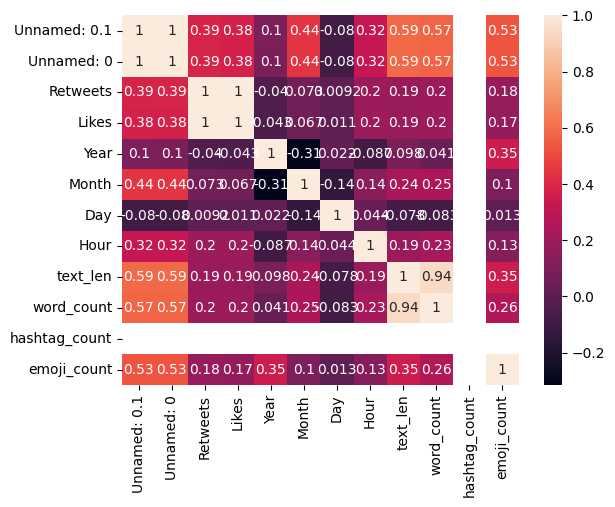

In [48]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

In [57]:
df_groupby = df.groupby('Platform')[['Likes', 'Retweets']].mean().sort_values(by='Likes', ascending=False)
df_groupby.style.format("{:.1f}")

,Likes,Retweets
Platform,,
Twitter,45.4,22.8
Instagram,45.1,22.6
Facebook,41.9,21.0
Twitter,37.3,18.7


In [ ]:
df['Country'].value_counts()


Country
USA               59
USA               55
UK                49
Canada            44
Australia         41
                  ..
Netherlands        1
USA                1
Germany            1
France             1
USA                1
Name: count, Length: 115, dtype: int64

Strings might have empty values and that messes up de 'country' data

In [62]:
df['Country'].value_counts(normalize=True) * 100

Country
USA              8.06
USA              7.51
UK               6.69
Canada           6.01
Australia        5.60
                 ... 
Netherlands      0.14
USA              0.14
Germany          0.14
France           0.14
USA              0.14
Name: proportion, Length: 115, dtype: float64

In [61]:
df.groupby('Country')[['Likes', 'Retweets', 'emoji_count', 'word_count']].mean().sort_values(by='Likes', ascending=False)

,Likes,Retweets,emoji_count,word_count
Country,,,,
India,80.00,40.00,1.00,9.00
South Africa,80.00,40.00,1.50,12.50
Belgium,70.00,35.00,1.00,10.50
Japan,70.00,35.00,1.00,12.00
Netherlands,70.00,35.00,1.00,17.00
...,...,...,...,...
Canada,25.00,12.00,2.00,6.00
Australia,24.20,12.00,1.20,11.00
Canada,21.67,11.00,1.00,10.67


In [58]:
df_groupby = df.groupby('Sentiment')[['Likes', 'Retweets']].mean().sort_values(by='Retweets', ascending=False)
df_groupby.style.format("{:.1f}")

,Likes,Retweets
Sentiment,,
Motivation,80.0,40.0
Mesmerizing,80.0,40.0
Wonder,80.0,40.0
Wonder,80.0,40.0
Anticipation,80.0,40.0
Thrill,80.0,40.0
Imagination,70.0,35.0
Whispers of the Past,70.0,35.0
Emotion,70.0,35.0
